# Análisis exploratio
Análisis exploratorio de nuestros variables para observar como es que están distribuidas y que información relevante podemos obtener de ellas.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from textblob import TextBlob

In [2]:
df = pd.read_csv('/home/melanie/PycharmProjects/final-exam-pcd2024-autumn/raw_data/data.csv')
df.head(2)

,Unnamed: 0,complaint_what_happened,ticket_classification
0,0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...


In [3]:
df = df[['complaint_what_happened', 'ticket_classification']]
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


In [4]:
def reporte(df):
    dtyp = pd.DataFrame(df.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(df.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
    return dtyp.join(missing).join(unival)#.join(maximo).join(minimo)
reporte(df)

,Tipo,Valores_Nulos,Valores_Unicos
complaint_what_happened,object,0,18824
ticket_classification,object,0,78


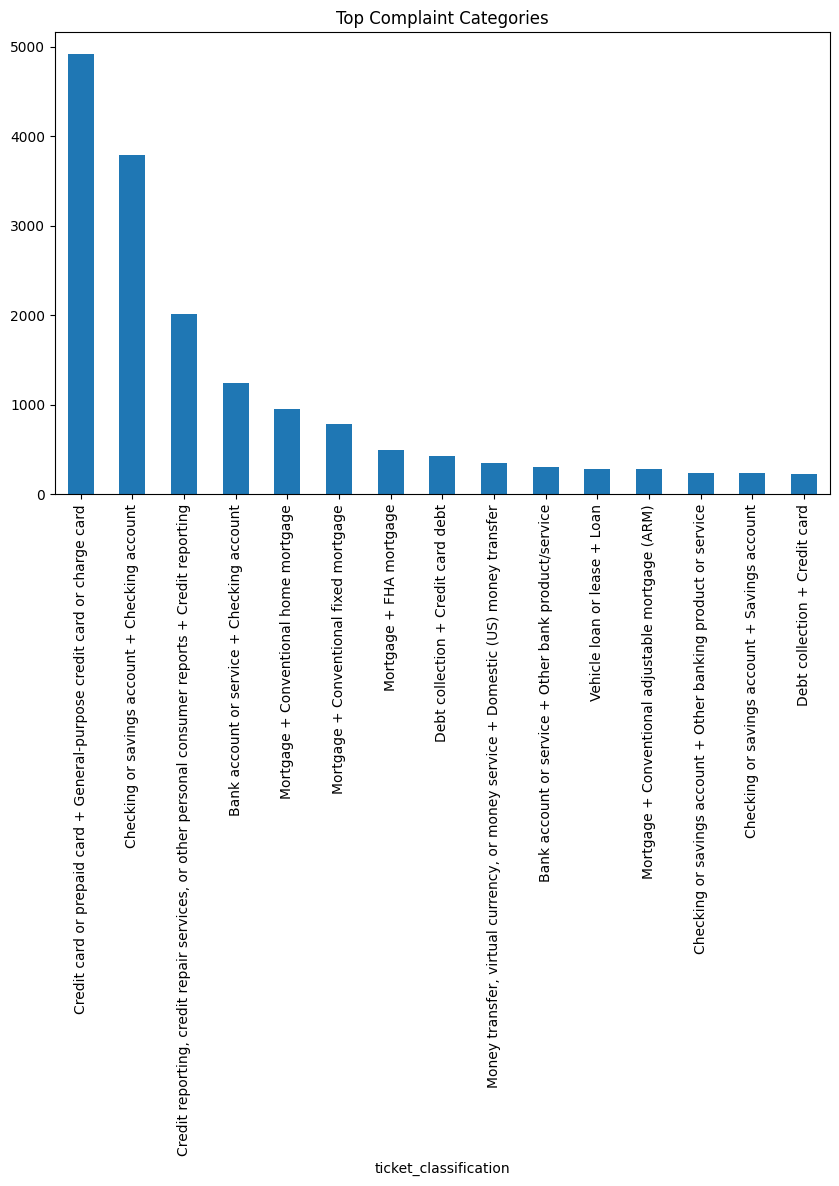

In [18]:
df['ticket_classification'].value_counts().head(15).plot(kind='bar', figsize=(10, 6), title='Top Complaint Categories')
plt.show()

Podemos observar una grafica en la que se muestran las categorías que más se repiten en la classificación del ticket, de la cual podemos observar que la mayor parte de personas llama para revisar información respecto a sus tarjetas de crédito o tarjetas prepagadas, de ahí siguiendo una gran variedad de quejas que cada vez son menos representativas. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/melanie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


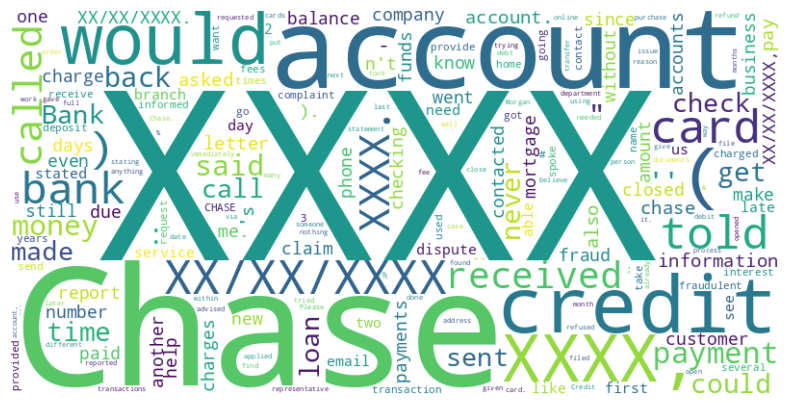

In [23]:
# Hacemos los tokens y quitamos stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['complaint_what_happened'].dropna())
filtered_words = [word for word in all_words.split() if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

# Visualización de la nube de palabras 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En esta nube de palabras podemos ver cuales son las que más se repiten, teniendo como pincipal el XXXX que representa que es infromación confidencial y al rededor de dichas palabras podemos observar tales como Chase, credit, account, would, que coincide con que la categoría más común sea respecto a las cuentas de credito. 

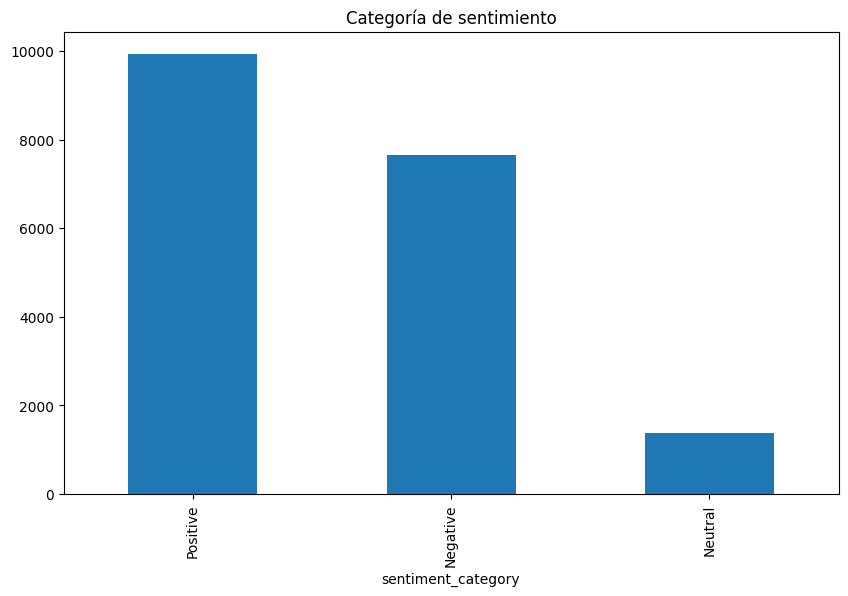

In [27]:
df['sentiment'] = df['complaint_what_happened'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
df['sentiment_category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Categoría de sentimiento')
plt.show()

Por último hicimos un análisis de sentimientos, en el cual dependiendo de los parámetros establecidos podemos observar que la mayor parte de quejas son positivas, mientras que un poco menor  esto son las quejas negativas, lo que nos podría ayudar a saber hacía que rama de quejas nos podemos enfocar para saber que mejorar. 